## 대구 지하철 이용승객 연도별 역별 DF 생성
* 이용승객 DF : 대구교통공사_월별하차인원_20240531.csv

In [140]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from utils import 한글
import numpy as np

In [141]:
# 데이터 로드
rawDF = pd.read_csv(r'C:\Users\KDP-46\Desktop\ex_pandas6\project_02\대구교통공사_월별하차인원_20240531.csv',
                    encoding='cp949')
rawDF

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0
3,2006,4,0,0,203337,135264,114652,357166,149190,138231,...,0,0,0,0,0,0,0,0,0,0
4,2006,5,0,0,211751,141466,121653,381829,147146,142701,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024,1,117837,113178,124272,227777,124202,312035,118131,104111,...,45414,82438,84829,49165,32287,83732,69688,61238,106580,67235
217,2024,2,111467,98717,116013,213138,115700,293237,109131,97778,...,42681,72443,75346,44402,29256,77510,64867,56647,97882,61003
218,2024,3,132814,122288,132768,243287,133226,334854,129690,108307,...,48628,85041,86515,52103,34565,89392,82175,66774,112198,69482
219,2024,4,131188,121285,131212,238101,130590,324909,129359,106754,...,49157,86047,84920,52595,35999,88943,89598,66360,113976,69808


In [142]:
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 93 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   년        221 non-null    int64
 1   월        221 non-null    int64
 2   설화명곡     221 non-null    int64
 3   화원       221 non-null    int64
 4   대곡       221 non-null    int64
 5   진천       221 non-null    int64
 6   월배       221 non-null    int64
 7   상인       221 non-null    int64
 8   월촌       221 non-null    int64
 9   송현       221 non-null    int64
 10  서부정류장    221 non-null    int64
 11  대명       221 non-null    int64
 12  안지랑      221 non-null    int64
 13  현충로      221 non-null    int64
 14  영대병원     221 non-null    int64
 15  교대       221 non-null    int64
 16  명덕1      221 non-null    int64
 17  반월당1     221 non-null    int64
 18  중앙로      221 non-null    int64
 19  대구역      221 non-null    int64
 20  칠성시장     221 non-null    int64
 21  신천       221 non-null    int64
 22  동대구역     221 non-null    i

In [143]:
# 모든 칼럼에 대해 결측치 없음 --> 결측치 처리 할 필요 X

In [144]:
rawDF.describe()

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,2014.714932,6.420814,47081.289593,45477.221719,204250.524887,180328.533937,122932.950226,359809.235294,134547.787330,119639.628959,...,19107.466063,42387.791855,38133.696833,26457.746606,17208.941176,43327.239819,38037.837104,31551.918552,56002.285068,31948.475113
std,5.332167,3.466636,56450.727111,54417.743529,46871.508300,37636.602444,13156.202852,48676.235983,19609.093147,13704.564257,...,19840.105909,44064.710732,39294.071323,27441.059497,17940.281565,44694.478819,39693.206423,32678.389333,57594.715052,32809.936684
min,2006.000000,1.000000,0.000000,0.000000,66332.000000,74582.000000,47668.000000,121209.000000,51409.000000,49220.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,3.000000,0.000000,0.000000,177244.000000,141793.000000,116186.000000,332458.000000,122114.000000,110916.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,6.000000,0.000000,0.000000,211675.000000,184684.000000,122848.000000,369446.000000,133335.000000,124057.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,9.000000,111231.000000,105405.000000,240234.000000,213138.000000,130472.000000,395673.000000,149402.000000,129391.000000,...,39806.000000,85041.000000,79242.000000,52595.000000,35347.000000,88645.000000,77642.000000,64225.000000,113670.000000,66140.000000
max,2024.000000,12.000000,136185.000000,132984.000000,293582.000000,252154.000000,152946.000000,436270.000000,169329.000000,143060.000000,...,49422.000000,109511.000000,95757.000000,66424.000000,50792.000000,109035.000000,146709.000000,80099.000000,138964.000000,90846.000000


In [145]:
rawDF.dtypes

년       int64
월       int64
설화명곡    int64
화원      int64
대곡      int64
        ...  
황금      int64
수성못     int64
지산      int64
범물      int64
용지      int64
Length: 93, dtype: object

### 데이터 전처리
- 1월-12월 데이터 보유 년도 데이터만 남기기 -> 2024년 데이터 행 삭제
- 연도별 역별 하차인원 DF을 구하기 위해 1월 -12월 데이터 행 합쳐서 '총합' 칼럼 "년" 옆에 생성

##### 1월-12월 데이터 보유 년도 데이터만 남기기 -> 2024년 데이터 행 삭제

In [146]:
rawDF.tail(10)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
211,2023,8,116615,109567,117305,216734,118021,302159,116845,101856,...,42685,76205,78155,44869,31394,79837,66389,58220,108740,65612
212,2023,9,117856,114297,122200,223374,120140,307473,120073,100133,...,44691,79654,80645,47941,32760,81662,85079,60077,108199,65297
213,2023,10,124405,120537,131743,237009,127680,328372,125688,106033,...,47605,84266,84468,51137,36064,87633,85150,64938,113670,69823
214,2023,11,123916,119246,131546,236502,128482,325368,126972,105379,...,47414,82378,84820,50972,35615,87280,73471,64111,112583,68809
215,2023,12,123361,116070,127658,237974,128130,331320,126621,104771,...,47845,83463,83438,51166,35069,86116,80008,62710,109467,67135
216,2024,1,117837,113178,124272,227777,124202,312035,118131,104111,...,45414,82438,84829,49165,32287,83732,69688,61238,106580,67235
217,2024,2,111467,98717,116013,213138,115700,293237,109131,97778,...,42681,72443,75346,44402,29256,77510,64867,56647,97882,61003
218,2024,3,132814,122288,132768,243287,133226,334854,129690,108307,...,48628,85041,86515,52103,34565,89392,82175,66774,112198,69482
219,2024,4,131188,121285,131212,238101,130590,324909,129359,106754,...,49157,86047,84920,52595,35999,88943,89598,66360,113976,69808
220,2024,5,136185,125477,136473,252154,137640,342382,133388,110625,...,49422,87600,86813,53389,37352,92353,83197,67626,117495,71447


In [147]:
# 2024년 행 데이터 삭제
rawDF.drop(index=rawDF.index[-5:], inplace=True)
rawDF.tail(10)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
206,2023,3,128914,126770,134771,247998,136136,350991,135355,112463,...,48338,84038,85090,54313,35627,95183,88586,64225,120293,73209
207,2023,4,121800,119156,128891,235342,128391,329029,131501,106812,...,48201,81901,81233,51178,35932,90315,83328,61472,115292,70354
208,2023,5,126760,122824,133878,243716,136832,343265,133335,110916,...,48783,83045,81748,52095,36449,91349,80423,63887,117688,70389
209,2023,6,122728,116419,127605,229366,128757,323126,128150,106433,...,47345,82738,81305,50443,35524,88089,79838,63066,112235,69123
210,2023,7,118889,111276,122753,222969,122978,311665,121229,104382,...,44414,79763,79339,46827,33191,83252,68288,59896,111095,66843
211,2023,8,116615,109567,117305,216734,118021,302159,116845,101856,...,42685,76205,78155,44869,31394,79837,66389,58220,108740,65612
212,2023,9,117856,114297,122200,223374,120140,307473,120073,100133,...,44691,79654,80645,47941,32760,81662,85079,60077,108199,65297
213,2023,10,124405,120537,131743,237009,127680,328372,125688,106033,...,47605,84266,84468,51137,36064,87633,85150,64938,113670,69823
214,2023,11,123916,119246,131546,236502,128482,325368,126972,105379,...,47414,82378,84820,50972,35615,87280,73471,64111,112583,68809
215,2023,12,123361,116070,127658,237974,128130,331320,126621,104771,...,47845,83463,83438,51166,35069,86116,80008,62710,109467,67135


##### 연도별 역별 총합 하차인원 DF
- 1월 -12월 데이터 행 합쳐서 '총합' 칼럼 "년" 옆에 생성

In [148]:
year_group_Df = rawDF.groupby("년")
year_group_Df.get_group(2006)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
0,2006,1,0,0,162387,122175,98250,306463,116039,117152,...,0,0,0,0,0,0,0,0,0,0
1,2006,2,0,0,167676,124945,100549,321823,120394,120687,...,0,0,0,0,0,0,0,0,0,0
2,2006,3,0,0,206452,141658,117971,373093,163141,143060,...,0,0,0,0,0,0,0,0,0,0
3,2006,4,0,0,203337,135264,114652,357166,149190,138231,...,0,0,0,0,0,0,0,0,0,0
4,2006,5,0,0,211751,141466,121653,381829,147146,142701,...,0,0,0,0,0,0,0,0,0,0
5,2006,6,0,0,189988,128669,109871,344053,132965,131208,...,0,0,0,0,0,0,0,0,0,0
6,2006,7,0,0,183678,127538,107286,337378,121405,132418,...,0,0,0,0,0,0,0,0,0,0
7,2006,8,0,0,184921,131025,108295,333188,119879,129558,...,0,0,0,0,0,0,0,0,0,0
8,2006,9,0,0,190419,132413,117805,343794,135577,134998,...,0,0,0,0,0,0,0,0,0,0
9,2006,10,0,0,189323,131045,116128,332843,125674,126429,...,0,0,0,0,0,0,0,0,0,0


In [149]:
sum_year = dict(zip( rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()) ) )
sum_year

{2006: 0,
 2007: 0,
 2008: 0,
 2009: 0,
 2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 0,
 2015: 0,
 2016: 0,
 2017: 0,
 2018: 0,
 2019: 0,
 2020: 0,
 2021: 0,
 2022: 0,
 2023: 0}

In [150]:
sum_year = dict(zip( rawDF["년"].unique().tolist(), [0]*len(rawDF["년"].unique()) ) ) 

for year in rawDF["년"].unique():
    sum_year[year] = year_group_Df.get_group(year).sum()[2:].tolist()

# sum_year

In [151]:
# 연도별 역별 하차인원 총합 DF 생성

year_out_DF = pd.DataFrame( sum_year, index=rawDF.columns[2:])
year_out_DF_final = year_out_DF.T.copy()

In [152]:
year_out_DF_final.head()

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,0,0,0,0,0,0,0,0,0,0


In [153]:
first_line = year_out_DF_final.loc[:,'설화명곡':'안심']
second_line = year_out_DF_final.loc[:, '문양':'영남대']
third_line = year_out_DF_final.loc[:, '칠곡경대병원':'용지']

In [154]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,아양교,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,1828031,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,1861635,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,1875219,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,1879293,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,1967905,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,2029255,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,2074648,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,2123897,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,2116911,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,2072536,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409


In [155]:
second_line

,문양,다사,대실,강창,계명대,성서산업단지,이곡,용산,죽전,감삼,...,만촌,담티,연호,대공원,고산,신매,사월,정평,임당,영남대
2006,714256,479071,431409,1311104,2569597,2046135,1434669,2711653,1680043,2032690,...,1282920,938415,140297,149190,749536,2616171,1956580,0,0,0
2007,748559,609371,480067,1406013,2560816,2086728,1382099,2762126,1670337,2157690,...,1372349,1006679,150784,181594,738945,2647971,2240735,0,0,0
2008,843485,600428,753350,1499394,2686437,2097263,1411304,2873779,1722626,2225724,...,1420144,1038045,171260,195814,801843,2597179,2623742,0,0,0
2009,854798,652987,1328450,1526047,2707690,2067932,1394957,2913282,1740792,2361482,...,1444657,1079509,170169,182204,839322,2462016,2958782,0,0,0
2010,891432,760130,1449457,1638789,2877237,2151160,1407128,3076591,1745262,2413856,...,1487281,1102825,166705,181954,862092,2434252,3108599,0,0,0
2011,969754,772528,1595523,1718339,2939182,2208514,1455236,3219414,1856343,2414378,...,1612608,1143372,181480,227746,963364,2515702,3308712,0,0,0
2012,1023005,793311,1881728,1706728,3066350,2157130,1479357,3288234,1992247,2485621,...,1691041,1230730,203312,245972,934129,2647352,2862695,388221,167335,1030158
2013,1090867,806471,2037206,1750499,3098930,2197122,1488088,3319177,2056978,2512991,...,1808412,1328467,228335,232679,981573,2842972,1712856,1456349,691529,3528143
2014,1090063,820421,2107361,1713642,3116387,2141501,1492337,3260877,2066000,2501305,...,1751764,1278048,240326,179256,958423,2811760,1624752,1532108,776090,3659440
2015,1067404,804379,2173585,1668354,3022538,2183132,1505973,3265445,2129395,2542477,...,1659743,1253737,230624,177857,915918,2773374,1617944,1517006,901034,3615663


In [156]:
third_line

,칠곡경대병원,학정,팔거,동천,칠곡운암,구암,태전,매천,매천시장,팔달,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,359041,84219,1061456,469117,900593,539013,529499,461961,201049,241091,...,298457,755472,551948,452840,331021,710787,815430,548188,917238,572935


In [157]:
# [] 데이터 준비
file_data=r'C:\Users\KDP-46\Desktop\ex_pandas6\project_02\대구교통공사_공기질_20231231.csv'

In [158]:
# [] CSV ==> DataFrame으로 저장
subwayDF=pd.read_csv(file_data,encoding='cp949')
subwayDF

,역사명,미세먼지(PM10),미세먼지(PM2.5),이산화탄소,폼알데하이드,일산화탄소,이산화질소,라돈,휘발성유기화합물
0,1호선평균,22.2,15.9,435,5.2,1.9,0.028,28,25.1
1,설화명곡,32.9,19.0,460,2.9,1.1,0.03,25.5,8.5
2,화원,35.9,20.6,460,3.9,1.0,0.033,10.5,65.7
3,대곡역,19.4,12.9,419,4.8,1.1,0.022,19.5,82.1
4,진천역,24.3,20.0,421,4.8,1.7,0.029,31,85.5
...,...,...,...,...,...,...,...,...,...
58,신매역,25.5,19.1,510,3.1,1.9,미측정,미측정,미측정
59,사월역,28.7,25.6,520,3.8,2.0,미측정,미측정,미측정
60,정평역,18.8,14.7,418,2.4,1.8,미측정,미측정,미측정
61,임당역,19.2,13.4,431,2.4,2.0,미측정,미측정,미측정


In [159]:
rawDF.index

RangeIndex(start=0, stop=216, step=1)

In [160]:
rawDF.columns

Index(['년', '월', '설화명곡', '화원', '대곡', '진천', '월배', '상인', '월촌', '송현', '서부정류장',
       '대명', '안지랑', '현충로', '영대병원', '교대', '명덕1', '반월당1', '중앙로', '대구역', '칠성시장',
       '신천', '동대구역', '동구청', '아양교', '동촌', '해안', '방촌', '용계', '율하', '신기', '반야월',
       '각산', '안심', '문양', '다사', '대실', '강창', '계명대', '성서산업단지', '이곡', '용산', '죽전',
       '감삼', '두류', '내당', '반고개', '청라언덕2', '반월당2', '경대병원', '대구은행', '범어', '수성구청',
       '만촌', '담티', '연호', '대공원', '고산', '신매', '사월', '정평', '임당', '영남대', '칠곡경대병원',
       '학정', '팔거', '동천', '칠곡운암', '구암', '태전', '매천', '매천시장', '팔달', '공단', '만평',
       '팔달시장', '원대', '북구청', '달성공원', '서문시장', '청라언덕3', '남산', '명덕3', '건들바위',
       '대봉교', '수성시장', '수성구민운동장', '어린이세상', '황금', '수성못', '지산', '범물', '용지'],
      dtype='object')

In [161]:
rawDF.tail(2)

,년,월,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,...,건들바위,대봉교,수성시장,수성구민운동장,어린이세상,황금,수성못,지산,범물,용지
214,2023,11,123916,119246,131546,236502,128482,325368,126972,105379,...,47414,82378,84820,50972,35615,87280,73471,64111,112583,68809
215,2023,12,123361,116070,127658,237974,128130,331320,126621,104771,...,47845,83463,83438,51166,35069,86116,80008,62710,109467,67135


In [162]:
first_line

,설화명곡,화원,대곡,진천,월배,상인,월촌,송현,서부정류장,대명,...,아양교,동촌,해안,방촌,용계,율하,신기,반야월,각산,안심
2006,0,0,2281143,1582727,1349384,4116828,1588371,1573900,3815431,1168064,...,1828031,591464,1094105,1201283,576655,445903,1231694,905698,1354935,1676196
2007,0,0,2465713,1547586,1436929,4067234,1447541,1479131,3587521,1123919,...,1861635,539202,1066301,1129764,579297,429181,1152810,925874,1354156,1787132
2008,0,0,2773489,1586943,1424722,4246640,1413141,1506228,3547117,1125631,...,1875219,529693,1077972,1103070,582321,450290,1174887,963067,1416594,1919978
2009,0,0,2665873,1650061,1409125,4230009,1370744,1513779,3456724,1099017,...,1879293,524635,1032562,1072365,598439,643104,1206475,914265,1349085,1999623
2010,0,0,2682135,1728905,1401545,4307647,1524297,1490567,3440455,1062094,...,1967905,530714,1011319,1072249,625729,1043487,1325812,915855,1377314,2127512
2011,0,0,2802528,1909004,1443530,4592981,1694722,1533770,3482533,1215257,...,2029255,542586,1004162,1194816,632055,1392827,1450514,946250,1414568,2237591
2012,0,0,2867615,2085445,1458735,4728331,1741014,1527339,3486241,1320682,...,2074648,550066,1002389,1246623,638520,1542614,1465891,893370,1446247,2356738
2013,0,0,3052262,2283953,1517167,4775371,1775446,1541743,3595806,1393995,...,2123897,576638,1054134,1237581,650022,1626667,1472887,791357,1446743,2409077
2014,0,0,3048716,2360686,1513165,4687037,1743539,1485766,3615729,1430419,...,2116911,619163,1087895,1244168,630720,1712260,1473514,788099,1510190,2458177
2015,0,0,3096735,2525773,1560232,4764510,1795786,1484263,3628271,1474398,...,2072536,679314,1070567,1258274,681992,1738613,1445736,811941,1522522,2452409


In [163]:
first_line.columns

Index(['설화명곡', '화원', '대곡', '진천', '월배', '상인', '월촌', '송현', '서부정류장', '대명', '안지랑',
       '현충로', '영대병원', '교대', '명덕1', '반월당1', '중앙로', '대구역', '칠성시장', '신천', '동대구역',
       '동구청', '아양교', '동촌', '해안', '방촌', '용계', '율하', '신기', '반야월', '각산', '안심'],
      dtype='object')

In [164]:
r1=first_line.loc[2023]/100000
r2=second_line.loc[2023]/100000

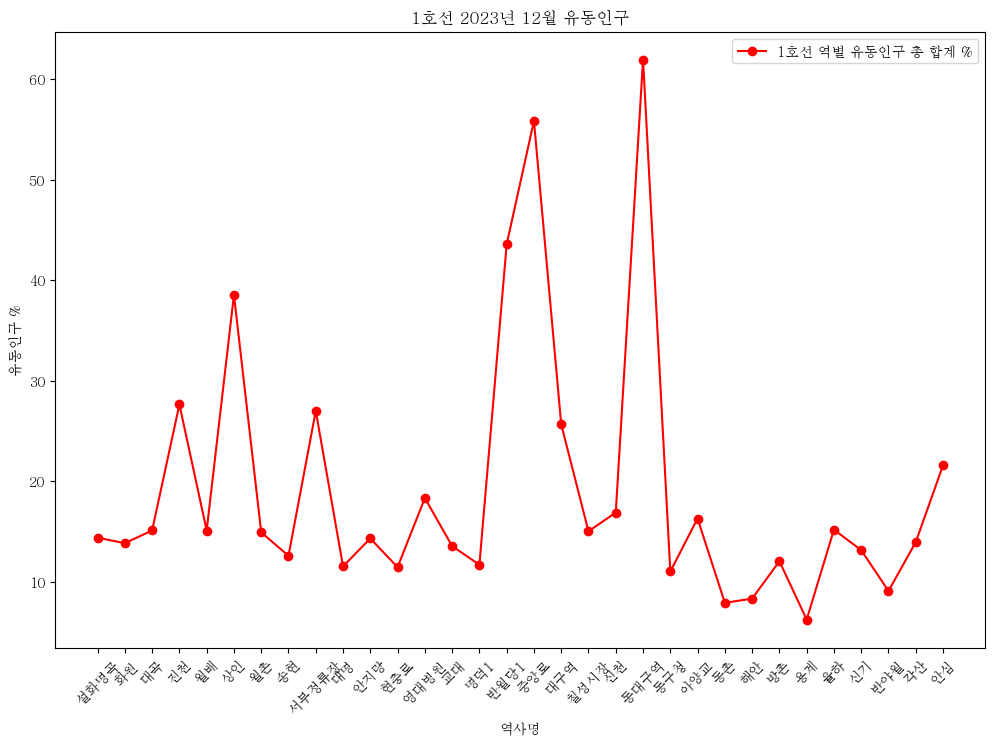

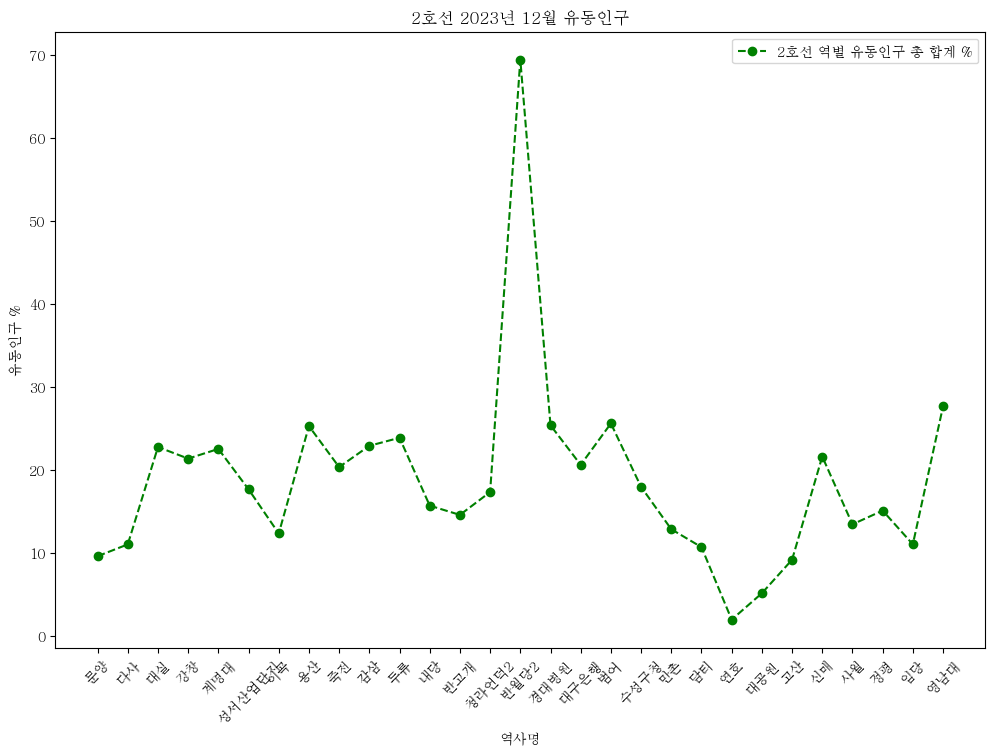

In [173]:
plt.figure(figsize=(12,8))
plt.plot( r1.index, r1.tolist(), 'ro-', label="1호선 역별 유동인구 총 합계 %")
plt.xticks(rotation=45)
# plt.tight_layout()

plt.title('1호선 2023년 12월 유동인구')
plt.ylabel('유동인구 %')
plt.xlabel('역사명')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot( r2.index, r2.tolist(), 'go--', label="2호선 역별 유동인구 총 합계 %")
plt.xticks(rotation=45)
# plt.tight_layout()


plt.title('2호선 2023년 12월 유동인구')
plt.ylabel('유동인구 %')
plt.xlabel('역사명')
plt.legend()
plt.show()

In [166]:
line1=subwayDF.loc[1:32,:]
line2=subwayDF.loc[34:,:]

In [167]:
x = line1[['역사명', '미세먼지(PM10)']]['역사명']
h = line1[['역사명', '미세먼지(PM10)']]['미세먼지(PM10)']
x = line2[['역사명', '미세먼지(PM10)']]['역사명']
h = line2[['역사명', '미세먼지(PM10)']]['미세먼지(PM10)']

C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Te

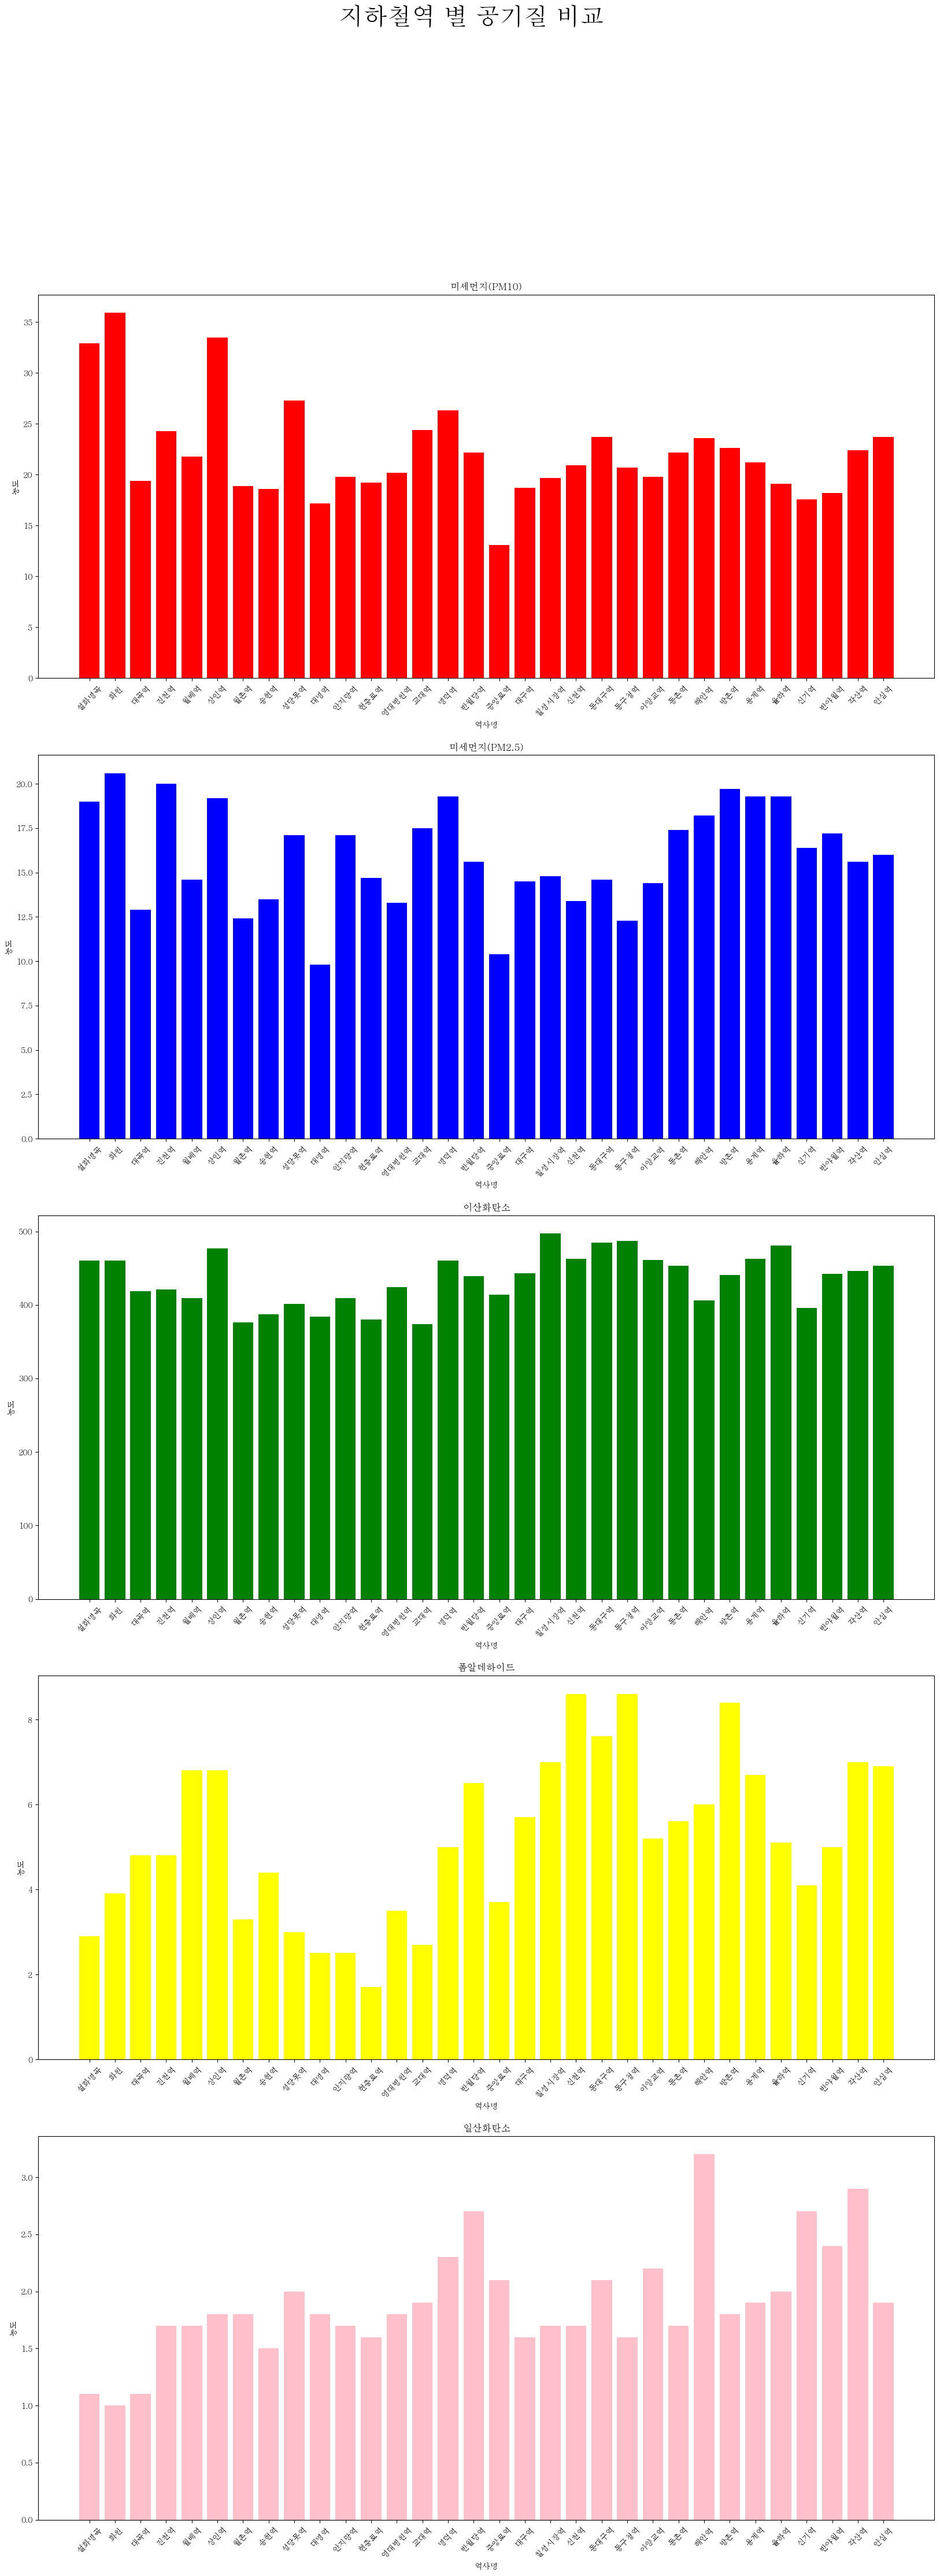

C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Temp\ipykernel_34176\639299803.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(x, rotation = 45)
C:\Users\KDP-46\AppData\Local\Te

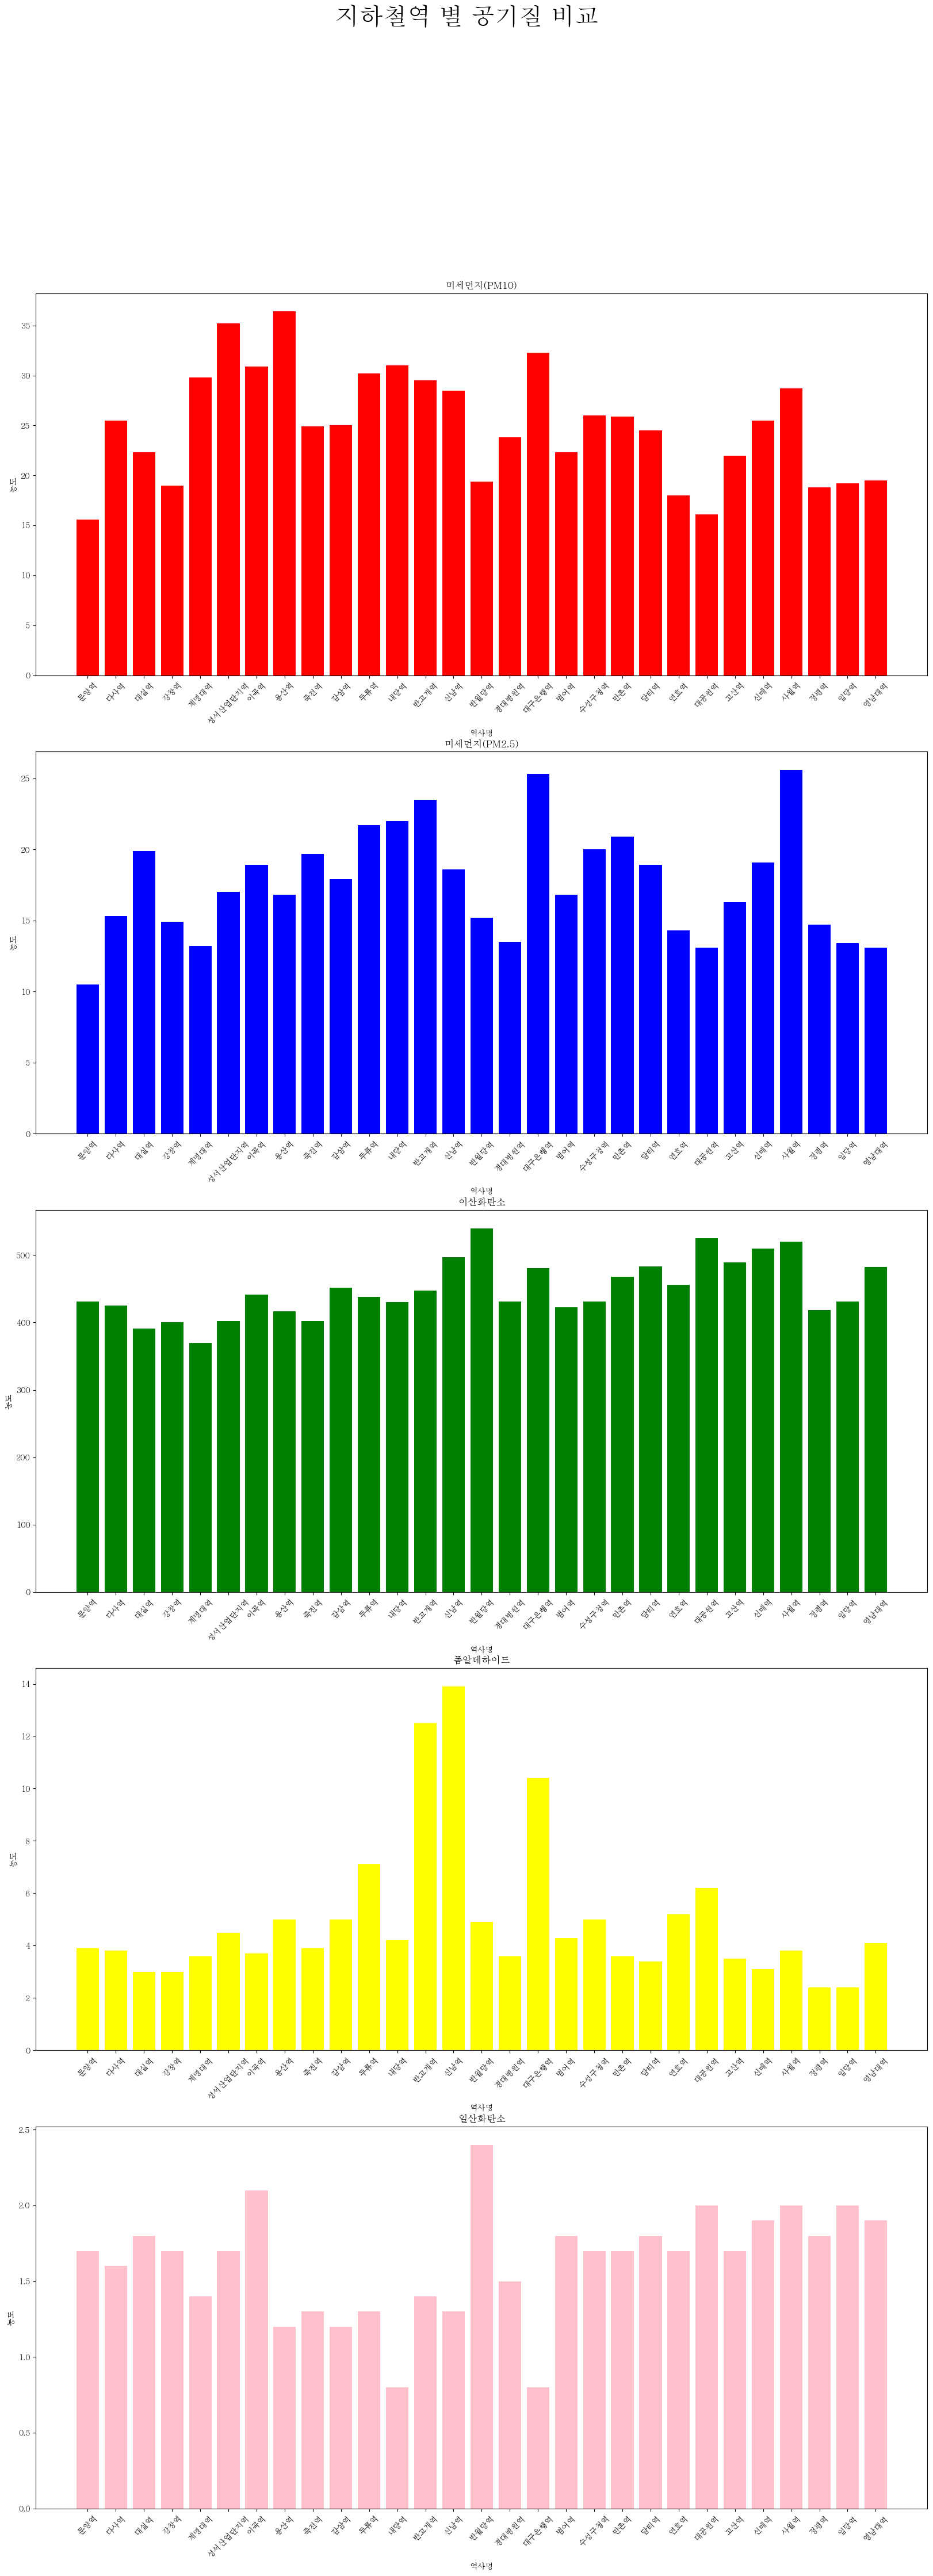

In [177]:
fig, axes = plt.subplots(5, 1, figsize = (20, 50))

fmf = ['red', 'blue', 'green', 'yellow', 'pink']

for idx, value in enumerate(line1.columns[1:6]):
    x = line1[['역사명', value]]['역사명']
    h = line1[['역사명', value]][value]
    axes[idx].bar(x, h, color = fmf[idx])
    axes[idx].set_title(line1.columns[1:6][idx])
    axes[idx].set_xlabel('역사명')
    axes[idx].set_ylabel('농도')
    axes[idx].set_xticklabels(x, rotation = 45)

plt.suptitle('지하철역 별 공기질 비교', fontsize = 30)
plt.show()

fig, axes = plt.subplots(5, 1, figsize = (20, 50))

fmf = ['red', 'blue', 'green', 'yellow', 'pink']

for idx, value in enumerate(line1.columns[1:6]):
    x = line2[['역사명', value]]['역사명']
    h = line2[['역사명', value]][value]
    axes[idx].bar(x, h, color = fmf[idx])
    axes[idx].set_title(line1.columns[1:6][idx])
    axes[idx].set_xlabel('역사명')
    axes[idx].set_ylabel('농도')
    axes[idx].set_xticklabels(x, rotation = 45)

plt.suptitle('지하철역 별 공기질 비교', fontsize = 30)
plt.show()